In [98]:
import os
os.getcwd()

'C:\\Users\\renug'

In [99]:
your_local_path = os.getcwd()

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
framing = pd.read_csv ('framingham.csv')

In [102]:
framing.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [103]:
framing.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [104]:
# data Cleaning

framing.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [105]:
# Remove columns that are 90% empty

thresh = len(framing)*.1
framing.dropna(thresh=thresh, axis=1, inplace=True)

In [106]:
#print(framing)

### Data Imputation

In [107]:
## Define a function impute_median: fill na cells with mean values

def impute_median(series):
    return series.fillna(series.median())

framing.glucose = framing['glucose'].transform(impute_median)
framing.education = framing['education'].transform(impute_median)
framing.heartRate = framing['heartRate'].transform(impute_median)
framing.totChol = framing['totChol'].transform(impute_median)
framing.BPMeds = framing['BPMeds'].transform(impute_median)


In [108]:
## group by classes that are in relation with other classes

by_currentSmoker_class=framing.groupby(['currentSmoker'])
framing.cigsPerDay=by_currentSmoker_class['cigsPerDay'].transform(impute_median)
by_age_class=framing.groupby(['male','diabetes'])
framing.BMI=by_age_class['BMI'].transform(impute_median)

In [109]:
framing.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798605,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.071386,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [110]:
def persontype_func(gender):
    if gender.item()==1:
        return 'Male'
    else:
        return 'Female' 
framing['PersonType'] = framing[['male']].apply(persontype_func, axis=1)

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


C:\Users\renug\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\renug\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


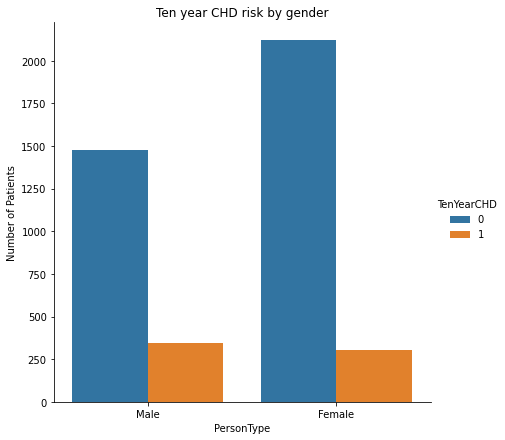

In [111]:
# How is 10-year risk of Coronary Heart Disease affect gender?

import seaborn as sns
mx = sns.factorplot(x="PersonType", hue='TenYearCHD',data=framing, kind="count", size=6)
mx.set(ylabel='Number of Patients')
plt.title('Ten year CHD risk by gender');

Text(0.5, 1.0, 'Agewise distribution of the patients')

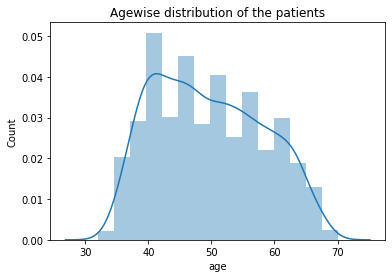

In [112]:
sns.distplot(framing['age'], bins=15, kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

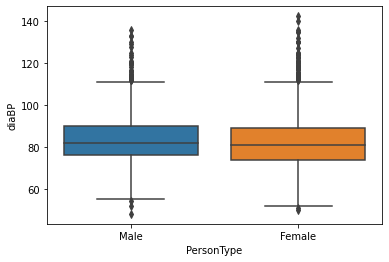

In [113]:
# Relation between income and default

sns.boxplot(x='PersonType', y='diaBP', data=framing)
plt.show()

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys


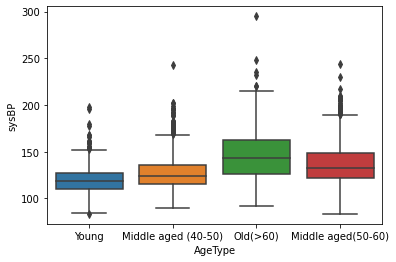

In [114]:
def agetype_func(age):
    
    if age.item()<40:
        return 'Young'
    elif age.item()>=40 and age.item()<50:
        return 'Middle aged (40-50)' 
    elif age.item()>=50 and age.item()<60:
        return 'Middle aged(50-60)'
    else:
        return 'Old(>60)'
framing['AgeType'] = framing[['age']].apply(agetype_func, axis=1)

sns.boxplot(x='AgeType', y='sysBP', data=framing)


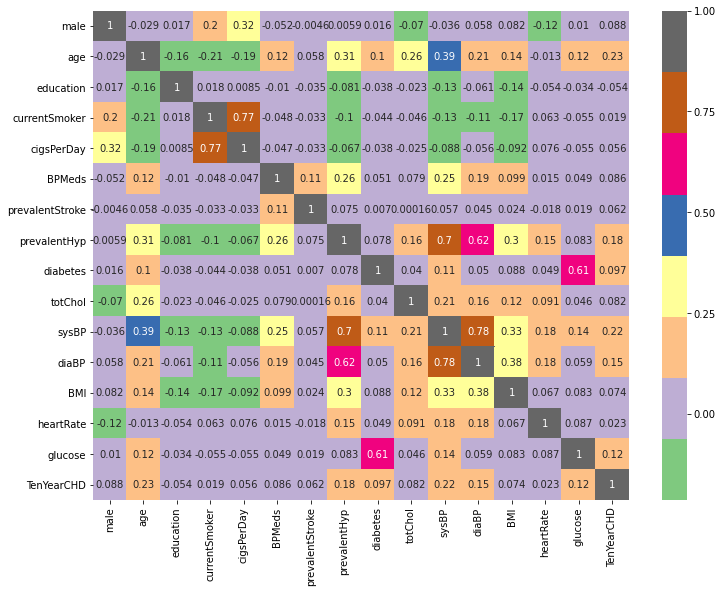

In [115]:
plt.figure(figsize=(12,9))
sns.heatmap(framing.corr(),cmap="Accent",annot=True)

In [116]:
framing.drop(['PersonType','AgeType'],axis=1,inplace=True)

### Create features and Labels

In [117]:
x = framing.drop (['TenYearCHD','education'],axis=1)
y = framing.TenYearCHD

### Split Train and Test Data

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=23)

In [119]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3180, 14)
(1060, 14)
(3180,)
(1060,)


In [120]:
y.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

### create instant of the model

In [121]:
import os,sys
from sklearn.linear_model import LogisticRegression


### Fit Model 

In [122]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(x_train, y_train)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict the model

In [ ]:
predicted = logreg.predict(x_test)

### Evaluate the model

In [126]:
from sklearn import metrics
result = metrics.classification_report(y_test, predicted)
print(result)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.67      0.04      0.07       152

    accuracy                           0.86      1060
   macro avg       0.76      0.52      0.50      1060
weighted avg       0.83      0.86      0.80      1060



In [127]:
result2 = metrics.accuracy_score(y_test, predicted)
print(result2)

0.8594339622641509
